Imports!

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sqlite3
import string
import seaborn as sns

Connect to and read from imdb database (SQL)

In [3]:
conn = sqlite3.connect('im.db')
imdb_basics_df = pd.read_sql("""
SELECT * FROM movie_basics
;""",conn)

Read The Movie Database CSV file

In [4]:
tmdb_df = pd.read_csv('tmdb.movies.csv')

Read The-Numbers.com movie budgets CSV file and call it the budget dataframe

In [5]:
budg_df = pd.read_csv('tn.movie_budgets.csv')

Read the Rotten Tomatoes databases and name them "info" and "review" respectively

In [6]:
info_df = pd.read_csv('rt.movie_info.tsv',delimiter='\t')

In [7]:
review_df = pd.read_csv('rt.reviews.tsv',delimiter='\t',encoding='windows-1252')

Create a list of unique genres which we will use to make dummy variables

In [9]:
genres = []
genre_list = list(imdb_basics_df.genres.value_counts().keys())
for x in genre_list:
    row_genres = []
    for y in x.split(','):
        genres.append(y)
genres = list(set(genres))

Convert the 'genres' column into a series of lists instead of objects concatenated with a comma

In [11]:
imdb_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [10]:
genres

['Mystery',
 'War',
 'Sport',
 'News',
 'Reality-TV',
 'Animation',
 'Western',
 'Short',
 'Talk-Show',
 'Comedy',
 'History',
 'Game-Show',
 'Fantasy',
 'Crime',
 'Action',
 'Musical',
 'Family',
 'Sci-Fi',
 'Thriller',
 'Adventure',
 'Biography',
 'Drama',
 'Music',
 'Horror',
 'Romance',
 'Documentary',
 'Adult']

In [13]:
imdb_basics_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"[Action, Crime, Drama]"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"[Biography, Drama]"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,[Drama]
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"[Comedy, Drama]"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"[Comedy, Drama, Fantasy]"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,[Drama]
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,[Documentary]
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,[Comedy]
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [12]:
for i,x in enumerate(imdb_basics_df.genres):
    genres_ = []
    if x is not None:
        for y in x.split(","):
            genres_.append(y)
        imdb_basics_df['genres'][i] = genres_

C:\Users\kapta\AppData\Local\Temp\ipykernel_25272\3072975444.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb_basics_df['genres'][i] = genres_


In [14]:

for genre in genres:        #genre is one of the unique genres from the list
    imdb_basics_df[genre] = 0
    for ind, value in enumerate(imdb_basics_df['genres']): # index is the index of the row - row is 
        if (value is not None):
            if (genre in value):
                imdb_basics_df[genre][ind]=1

C:\Users\kapta\AppData\Local\Temp\ipykernel_25272\999628234.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb_basics_df[genre][ind]=1
C:\Users\kapta\AppData\Local\Temp\ipykernel_25272\999628234.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb_basics_df[genre][ind]=1
C:\Users\kapta\AppData\Local\Temp\ipykernel_25272\999628234.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb_basics_df[genre][ind]=1
C:\Users\kapta\A

In [15]:
imdb_basics_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,Mystery,War,Sport,News,...,Sci-Fi,Thriller,Adventure,Biography,Drama,Music,Horror,Romance,Documentary,Adult
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"[Action, Crime, Drama]",0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"[Biography, Drama]",0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,[Drama],0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"[Comedy, Drama]",0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"[Comedy, Drama, Fantasy]",0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,[Drama],0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,[Documentary],0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,[Comedy],0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
imdb_reviews_df = pd.read_sql("""
SELECT * FROM movie_ratings
;""",conn)
imdb_reviews_df
imdb_basics_df = pd.merge(how='inner',left = imdb_basics_df,right = imdb_reviews_df,left_on = imdb_basics_df.movie_id,right_on=imdb_reviews_df.movie_id)
imdb_basics_df

,key_0,movie_id_x,primary_title,original_title,start_year,runtime_minutes,genres,Mystery,War,Sport,...,Biography,Drama,Music,Horror,Romance,Documentary,Adult,movie_id_y,averagerating,numvotes
0,tt0063540,tt0063540,Sunghursh,Sunghursh,2013,175.0,"[Action, Crime, Drama]",0,0,0,...,0,1,0,0,0,0,0,tt0063540,7.0,77
1,tt0066787,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"[Biography, Drama]",0,0,0,...,1,1,0,0,0,0,0,tt0066787,7.2,43
2,tt0069049,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,[Drama],0,0,0,...,0,1,0,0,0,0,0,tt0069049,6.9,4517
3,tt0069204,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"[Comedy, Drama]",0,0,0,...,0,1,0,0,0,0,0,tt0069204,6.1,13
4,tt0100275,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"[Comedy, Drama, Fantasy]",0,0,0,...,0,1,0,0,0,0,0,tt0100275,6.5,119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73851,tt9913084,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,[Documentary],0,0,0,...,0,0,0,0,0,1,0,tt9913084,6.2,6
73852,tt9914286,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"[Drama, Family]",0,0,0,...,0,1,0,0,0,0,0,tt9914286,8.7,136
73853,tt9914642,tt9914642,Albatross,Albatross,2017,NaN,[Documentary],0,0,0,...,0,0,0,0,0,1,0,tt9914642,8.5,8
73854,tt9914942,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,0,0,0,...,0,0,0,0,0,0,0,tt9914942,6.6,5


In [18]:
imdb_basics_df['sum_rating'] = imdb_basics_df['averagerating'] * imdb_basics_df['numvotes']

In [19]:
imdb_basics_df

,key_0,movie_id_x,primary_title,original_title,start_year,runtime_minutes,genres,Mystery,War,Sport,...,Drama,Music,Horror,Romance,Documentary,Adult,movie_id_y,averagerating,numvotes,sum_rating
0,tt0063540,tt0063540,Sunghursh,Sunghursh,2013,175.0,"[Action, Crime, Drama]",0,0,0,...,1,0,0,0,0,0,tt0063540,7.0,77,539.0
1,tt0066787,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"[Biography, Drama]",0,0,0,...,1,0,0,0,0,0,tt0066787,7.2,43,309.6
2,tt0069049,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,[Drama],0,0,0,...,1,0,0,0,0,0,tt0069049,6.9,4517,31167.3
3,tt0069204,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"[Comedy, Drama]",0,0,0,...,1,0,0,0,0,0,tt0069204,6.1,13,79.3
4,tt0100275,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"[Comedy, Drama, Fantasy]",0,0,0,...,1,0,0,0,0,0,tt0100275,6.5,119,773.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73851,tt9913084,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,[Documentary],0,0,0,...,0,0,0,0,1,0,tt9913084,6.2,6,37.2
73852,tt9914286,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"[Drama, Family]",0,0,0,...,1,0,0,0,0,0,tt9914286,8.7,136,1183.2
73853,tt9914642,tt9914642,Albatross,Albatross,2017,NaN,[Documentary],0,0,0,...,0,0,0,0,1,0,tt9914642,8.5,8,68.0
73854,tt9914942,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,0,0,0,...,0,0,0,0,0,0,tt9914942,6.6,5,33.0


We remove the punctuation and whitespace from the titles to create better matching

First make a list of all characters we want to remove

In [21]:
punct_list = list(string.punctuation) + [" "]
len(punct_list)

33

We do the replace and also set all titles to lowercase
We do this for the original title and the primary title, as well as for the titles in the budget dataframe

In [22]:
og_list = imdb_basics_df.original_title.str.lower()
for char in punct_list:
    og_list = og_list.str.replace(char,"")
og_list
imdb_basics_df['og_name'] = og_list

C:\Users\kapta\AppData\Local\Temp\ipykernel_25272\2743537487.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  og_list = og_list.str.replace(char,"")


In [23]:
prim_list = imdb_basics_df.primary_title.str.lower()
for char in punct_list:
    prim_list = prim_list.str.replace(char,"")
prim_list
imdb_basics_df['prim_name'] = prim_list

C:\Users\kapta\AppData\Local\Temp\ipykernel_25272\3155770604.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  prim_list = prim_list.str.replace(char,"")


In [24]:
budget_list = budg_df.movie.str.lower()
for char in punct_list:
    budget_list = budget_list.str.replace(char,"")
budget_list
budg_df['key_name'] = budget_list
budg_df

C:\Users\kapta\AppData\Local\Temp\ipykernel_25272\3876272036.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  budget_list = budget_list.str.replace(char,"")


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,key_name
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",avatar
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",piratesofthecaribbeanonstrangertides
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",darkphoenix
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",avengersageofultron
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",starwarsepviiithelastjedi
...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0,red11
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495",following
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338",returntothelandofwonders
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0,aplaguesopleasant


Next we create a list of titles to act as keys to match with the budget dataframe by checking which one has a match before using it.

In [25]:
key_titles = []
target = list(budget_list)
for i,v in enumerate(list(imdb_basics_df.prim_name.values)):
    x = imdb_basics_df.og_name.values[i]
    if v in target:
        key_titles.append(v)
    elif x in target:
        key_titles.append(x)
    else: key_titles.append(np.NaN)
imdb_basics_df['key_title'] = key_titles
len(list(set(key_titles)))

2294

Before we do our join, we drop duplicates.

In [26]:

imdb_basics_df.drop_duplicates(subset = 'key_title', inplace = True)

In [27]:
budg_df.drop_duplicates(subset = 'key_name', inplace = True)

Then we can do our join

In [31]:
imdb_basics_df

,key_0,movie_id_x,primary_title,original_title,start_year,runtime_minutes,genres,Mystery,War,Sport,...,Romance,Documentary,Adult,movie_id_y,averagerating,numvotes,sum_rating,og_name,prim_name,key_title
0,tt0063540,tt0063540,Sunghursh,Sunghursh,2013,175.0,"[Action, Crime, Drama]",0,0,0,...,0,0,0,tt0063540,7.0,77,539.0,sunghursh,sunghursh,NaN
16,tt0249516,tt0249516,Foodfight!,Foodfight!,2012,91.0,"[Action, Animation, Comedy]",0,0,0,...,0,0,0,tt0249516,1.9,8248,15671.2,foodfight,foodfight,foodfight
33,tt0326592,tt0326592,The Overnight,The Overnight,2010,88.0,None,0,0,0,...,0,0,0,tt0326592,7.5,24,180.0,theovernight,theovernight,theovernight
41,tt0337692,tt0337692,On the Road,On the Road,2012,124.0,"[Adventure, Drama, Romance]",0,0,0,...,1,0,0,tt0337692,6.1,37886,231104.6,ontheroad,ontheroad,ontheroad
47,tt0359950,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"[Adventure, Comedy, Drama]",0,0,0,...,0,0,0,tt0359950,7.3,275300,2009690.0,thesecretlifeofwaltermitty,thesecretlifeofwaltermitty,thesecretlifeofwaltermitty
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71450,tt8680254,tt8680254,Richard III,Richard III,2016,NaN,[Drama],0,0,0,...,0,0,0,tt8680254,9.1,28,254.8,richardiii,richardiii,richardiii
71831,tt8824064,tt8824064,Heroes,Heroes,2019,88.0,[Documentary],0,0,0,...,0,1,0,tt8824064,7.3,7,51.1,heroes,heroes,heroes
72236,tt8976772,tt8976772,Push,Push,2019,92.0,[Documentary],0,0,0,...,0,1,0,tt8976772,7.3,33,240.9,push,push,push
72350,tt9024106,tt9024106,Unplanned,Unplanned,2019,106.0,"[Biography, Drama]",0,0,0,...,0,0,0,tt9024106,6.3,5945,37453.5,unplanned,unplanned,unplanned


In [ ]:
merged_df

In [30]:
merged_df = pd.merge(how='inner',left = imdb_basics_df,right = budg_df,left_on = imdb_basics_df.key_title,right_on=budg_df.key_name)

ValueError: cannot insert key_0, already exists

Loop over list of column names where floats are saved as objects and strip characters.
Then, save them as floats.

In [33]:
objects_to_floats = ['production_budget','domestic_gross','worldwide_gross']

for x in objects_to_floats:
    merged_df[x] = merged_df[x].str.replace('$',"")
    merged_df[x] = merged_df[x].str.replace(',',"")
    merged_df[x] = merged_df[x].astype('float64')

NameError: name 'merged_df' is not defined

Create a new column that calculates profitability of a film

In [17]:
merged_df['Profitability'] = merged_df.worldwide_gross - merged_df.production_budget

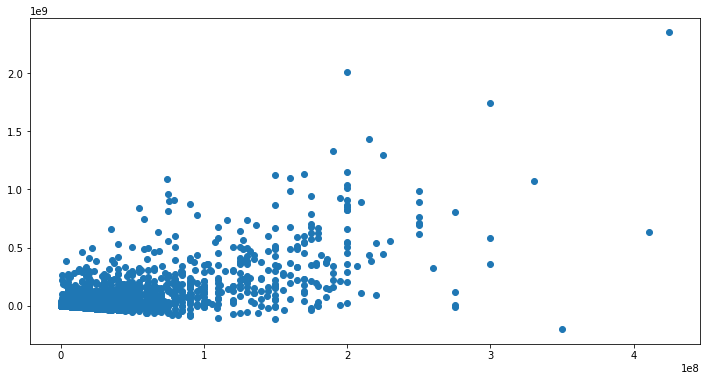

In [47]:
x=merged_df.production_budget
y=merged_df.Profitability
fig,ax = plt.subplots(figsize = (12,6))
ax.scatter(x,y);

In [48]:
merged_df['ROI_ratio'] = merged_df.Profitability / merged_df.production_budget

In [49]:
dfb = pd.DataFrame(merged_df.production_budget)
for i,x in enumerate(genres):
    dfb[x] = merged_df[x] * merged_df.production_budget
dfb

,production_budget,News,Fantasy,Drama,Action,Mystery,Animation,Music,Sci-Fi,War,...,Romance,Thriller,Family,Sport,Musical,Documentary,History,Adventure,Biography,Horror
0,45000000.0,0.0,0.0,0.0,45000000.0,0.0,45000000.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,20000000.0,0.0,20000000.0,0.0,20000000.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20000000.0,0.0,0.0
2,200000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,25000000.0,0.0,0.0,25000000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,25000000.0,0.0,0.0,0.0,0.0,0.0,0.0,25000000.0,0.0,0.0
4,91000000.0,0.0,0.0,91000000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,91000000.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2482,2500000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2500000.0,0.0,2500000.0,0.0,0.0,0.0,0.0
2483,5000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2484,22000000.0,0.0,0.0,22000000.0,22000000.0,0.0,0.0,0.0,0.0,0.0,...,22000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2485,15000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,15000000.0,15000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
dfp = pd.DataFrame(merged_df.Profitability)
for i,x in enumerate(genres):
    dfp[x] = merged_df[x] * merged_df.Profitability
dfp

,Profitability,Sport,Adventure,Sci-Fi,Mystery,Drama,Western,Animation,Biography,History,...,Music,Thriller,Horror,Action,War,Fantasy,Crime,News,Family,Comedy
0,-44926294.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-44926294.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-44926294.0,-0.0,-0.0,-0.0,-0.0,-0.0,-44926294.0
1,102133227.0,0.0,102133227.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,102133227.0,0.0,102133227.0,0.0,0.0,0.0,0.0
2,965996.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-15686698.0,-0.0,-15686698.0,-0.0,-0.0,-15686698.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
4,96861183.0,0.0,96861183.0,0.0,0.0,96861183.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,96861183.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2482,-2325745.0,-2325745.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
2483,7592907.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,7592907.0,0.0,0.0,0.0
2484,5882226.0,0.0,0.0,0.0,0.0,5882226.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5882226.0,0.0,0.0,0.0,0.0,0.0,0.0
2485,1829464.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1829464.0,0.0,0.0,0.0,0.0,1829464.0,0.0,0.0,0.0


In [34]:
col_names = list(dfp.columns)[1:]

Text(0, 0.5, 'ROI (Profit per Dollar Spend)')

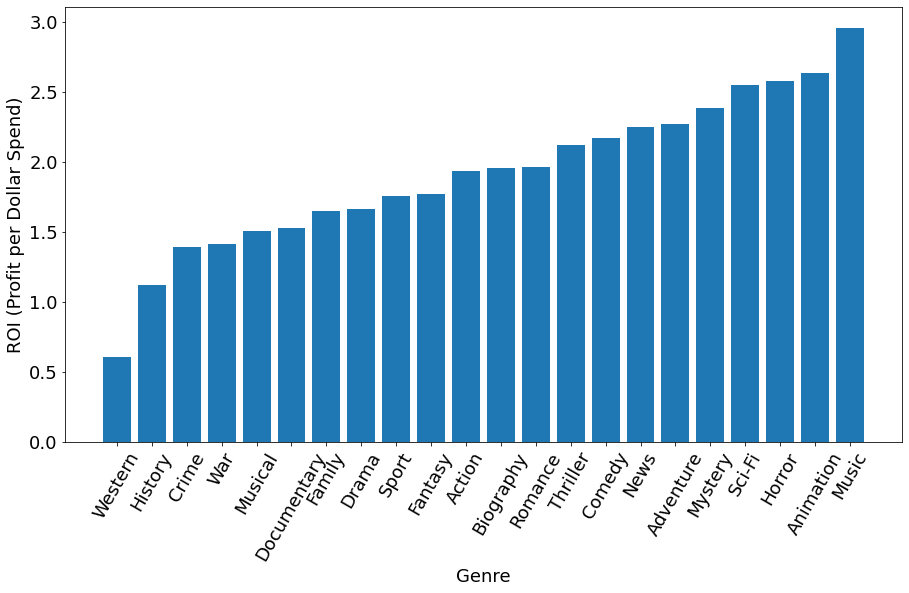

In [89]:
profits = dfp.sum(axis=0)[1:]
costs = dfb.sum(axis=0)[1:]

vals = pd.Series(profits.values / costs.values)

df_chart = pd.DataFrame(genres,columns=['genres'])
df_chart['average_ROI'] = vals
df_chart = df_chart.sort_values(by = 'average_ROI')
x =  df_chart.genres
y = df_chart.average_ROI
fig,ax=plt.subplots(figsize=(15,8))
plt.xticks(rotation = 60)
ax.bar(x,y)
ax.set_xlabel('Genre')
ax.set_ylabel('ROI (Profit per Dollar Spend)')
#ax.set_title('Average ROI by Genre')

In [61]:
profits

Sport          8.090386e+05
Adventure      3.723339e+07
Sci-Fi         1.380233e+07
Mystery        3.792124e+06
Drama          1.914205e+07
Western        2.019434e+05
Animation      1.169392e+07
Biography      3.386828e+06
History        8.152325e+05
Documentary    2.191893e+06
Musical        3.472975e+05
Romance        4.720602e+06
Music          1.362466e+06
Thriller       9.257612e+06
Horror         5.139942e+06
Action         3.090687e+07
War            5.180030e+05
Fantasy        8.621528e+06
Crime          5.010298e+06
News           2.896017e+04
Family         4.768487e+06
Comedy         2.152954e+07
dtype: float64

Text(0, 0.5, 'Profitability (Total Profit for Film)')

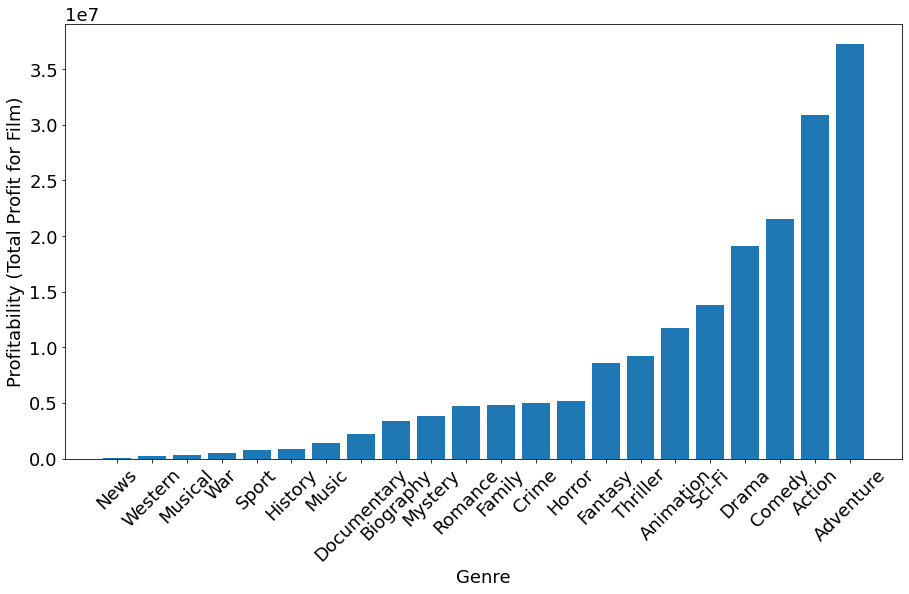

In [87]:
vals = dfp.mean(axis=0)[1:].sort_values()
plt.rcParams.update({'font.size': 18})
x = vals.keys()
y = vals.values
fig,ax=plt.subplots(figsize=(15,8))
plt.xticks(rotation = 45)
ax.bar(x,y)
ax.set_xlabel('Genre')
ax.set_ylabel('Profitability (Total Profit for Film)')
#ax.set_title('Average Profitability by Genre')

In [63]:
merged_df['number_of_genres'] = merged_df.genres.str.len()
merged_df

,key_0,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,og_name,prim_name,key_title,...,Horror,Action,War,Fantasy,Crime,News,Family,Comedy,ROI_ratio,number_of_genres
0,foodfight,tt0249516,Foodfight!,Foodfight!,2012,91.0,"[Action, Animation, Comedy]",foodfight,foodfight,foodfight,...,0,1,0,0,0,0,0,1,-0.998362,3.0
1,mortalkombat,tt0293429,Mortal Kombat,Mortal Kombat,2021,NaN,"[Action, Adventure, Fantasy]",mortalkombat,mortalkombat,mortalkombat,...,0,1,0,1,0,0,0,0,5.106661,3.0
2,theovernight,tt0326592,The Overnight,The Overnight,2010,88.0,None,theovernight,theovernight,theovernight,...,0,0,0,0,0,0,0,0,4.829980,NaN
3,ontheroad,tt0337692,On the Road,On the Road,2012,124.0,"[Adventure, Drama, Romance]",ontheroad,ontheroad,ontheroad,...,0,0,0,0,0,0,0,0,-0.627468,3.0
4,thesecretlifeofwaltermitty,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"[Adventure, Comedy, Drama]",thesecretlifeofwaltermitty,thesecretlifeofwaltermitty,thesecretlifeofwaltermitty,...,0,0,0,0,0,0,0,1,1.064409,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2482,fuel,tt9678962,Fuel,Fuel,2018,NaN,"[Documentary, Sport]",fuel,fuel,fuel,...,0,0,0,0,0,0,0,0,-0.930298,2.0
2483,diner,tt9729206,Diner,Diner,2019,NaN,[Crime],diner,diner,diner,...,0,0,0,0,1,0,0,0,1.518581,1.0
2484,traitor,tt9805168,Traitor,Traitor,2015,110.0,"[Action, Drama, Romance]",traitor,traitor,traitor,...,0,1,0,0,0,0,0,0,0.267374,3.0
2485,kisskissbangbang,tt9889814,Kiss Kiss Bang Bang,Kiss Kiss Bang Bang,2017,98.0,"[Crime, Romance, Thriller]",kisskissbangbang,kisskissbangbang,kisskissbangbang,...,0,0,0,0,1,0,0,0,0.121964,3.0


,start_year,runtime_minutes,id,production_budget,domestic_gross,worldwide_gross,Profitability,Sport,Adventure,Sci-Fi,...,Thriller,Horror,Action,War,Fantasy,Crime,News,Family,Comedy,ROI_ratio
number_of_genres,,,,,,,,,,,,,,,,,,,,,
1.0,1123818,41219.0,27650,1.202250e+10,1.611287e+10,3.245158e+10,2.042908e+10,2,5,5,...,31,47,21,3,3,5,0,7,93,1092.667924
2.0,1167863,56363.0,30172,1.260431e+10,1.766324e+10,3.574142e+10,2.313712e+10,13,29,18,...,123,65,54,11,12,52,1,34,192,1645.697751
3.0,2662224,136780.0,66565,6.315542e+10,7.489304e+10,1.945184e+11,1.313630e+11,35,405,159,...,245,180,497,24,145,261,1,104,430,3666.095656


Text(0.5, 1.0, 'Average Profitability by Number of Genres')

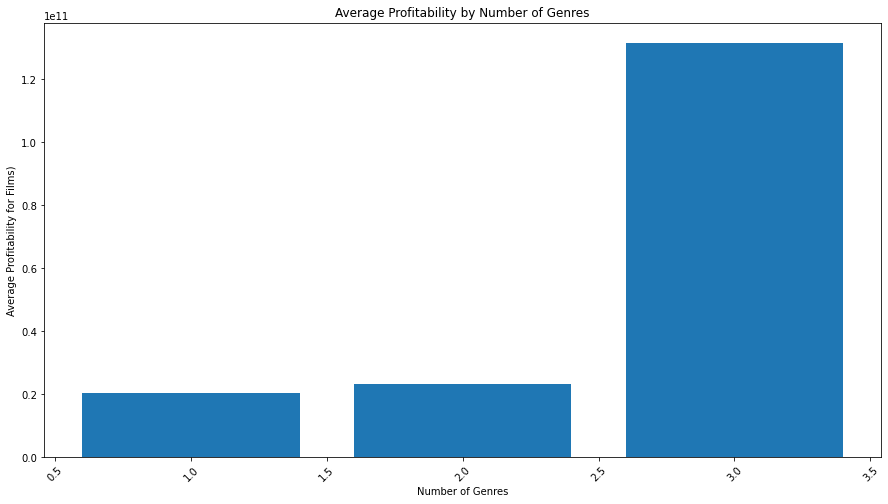

In [82]:
chart_data = merged_df.groupby('number_of_genres').sum()

x = chart_data.index
y = chart_data['Profitability']
fig,ax=plt.subplots(figsize=(15,8))
plt.xticks(rotation = 45)
ax.bar(x,y)
ax.set_xlabel('Number of Genres')
ax.set_ylabel('Average Profitability for Films)')
ax.set_title('Average Profitability by Number of Genres')

Text(0.5, 1.0, 'Average ROI by Number of Genres')

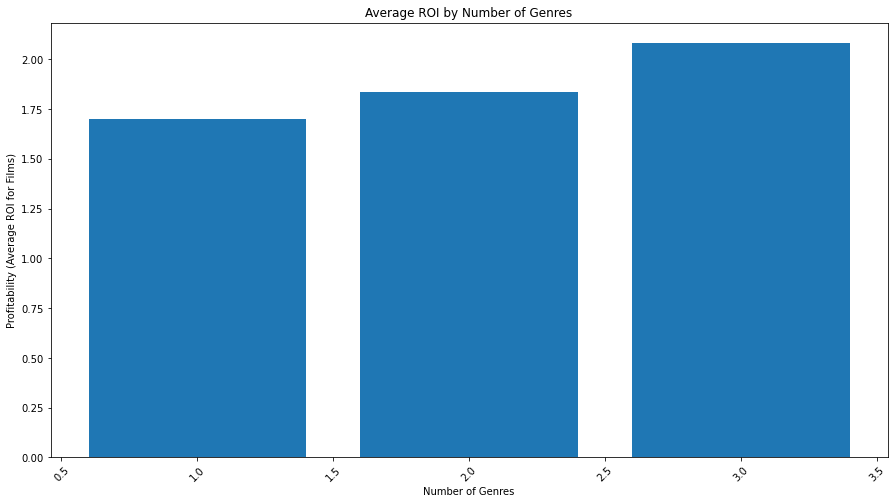

In [80]:
x = chart_data.index
y = chart_data['Profitability']/chart_data['production_budget']
fig,ax=plt.subplots(figsize=(15,8))
plt.xticks(rotation = 45)
ax.bar(x,y)
ax.set_xlabel('Number of Genres')
ax.set_ylabel('Profitability (Average ROI for Films)')
ax.set_title('Average ROI by Number of Genres')

In [79]:
chart_data.index

Float64Index([1.0, 2.0, 3.0], dtype='float64', name='number_of_genres')

In [38]:
dfn = pd.DataFrame(imdb_basics_df.numvotes)
for i,x in enumerate(genres):
    dfn[x] = imdb_basics_df[x] * imdb_basics_df.numvotes

Text(0, 0.5, 'Average Number of Ratings for Films)')

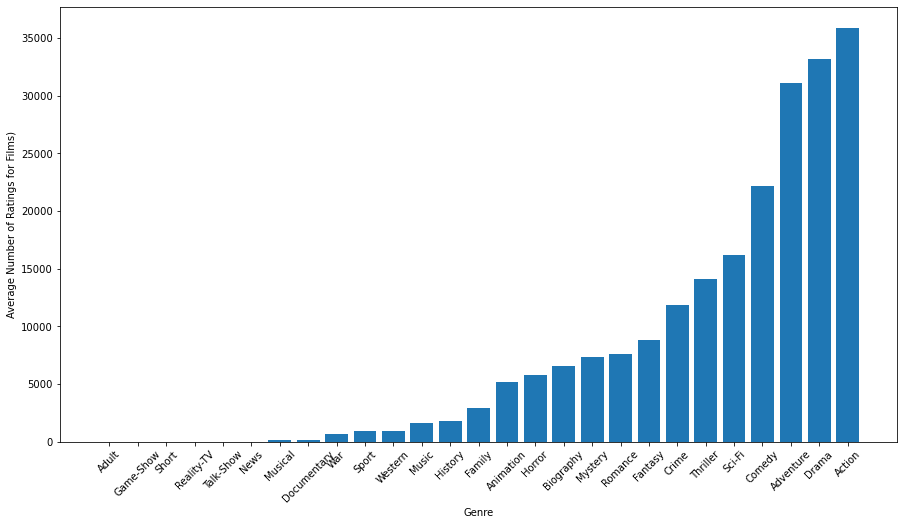

In [37]:
vals = dfn.mean(axis=0)[1:].sort_values()
x = vals.keys()
y = vals.values
fig,ax=plt.subplots(figsize=(15,8))
plt.xticks(rotation = 45)
ax.bar(x,y)
ax.set_xlabel('Genre')
ax.set_ylabel('Average Number of Ratings for Films)')
#ax.set_title('Average Number of Ratings by Genre')

In [40]:
dfr = pd.DataFrame(imdb_basics_df.sum_rating)
for i,x in enumerate(genres):
    dfr[x] = imdb_basics_df[x] * imdb_basics_df.sum_rating

C:\Users\kapta\AppData\Local\Temp\ipykernel_25272\2438985021.py:4: RuntimeWarning: invalid value encountered in true_divide
  vals = pd.Series(sum_rating.values / num_ratings.values)


Text(0, 0.5, 'ROI (Profit per Dollar Spend)')

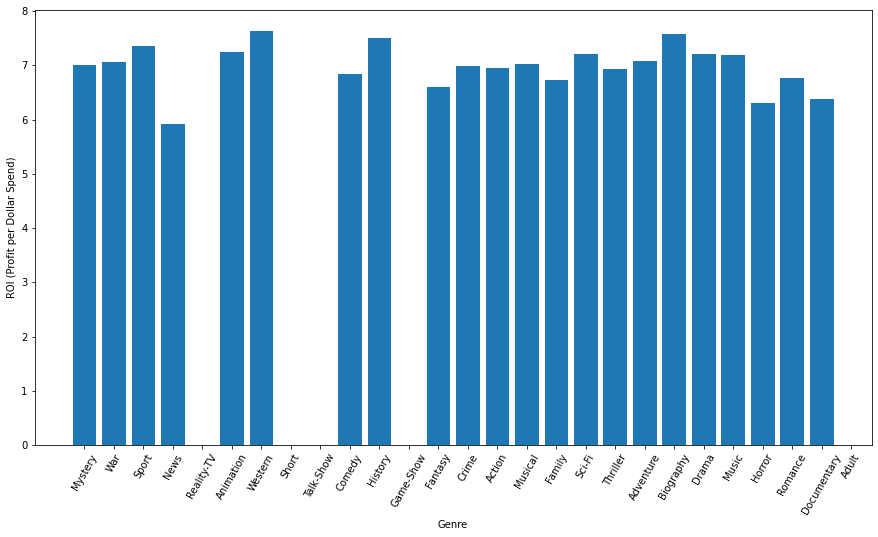

In [42]:
num_ratings = dfn.sum(axis=0)[1:]
sum_rating = dfr.sum(axis=0)[1:]

vals = pd.Series(sum_rating.values / num_ratings.values)

df_chart = pd.DataFrame(genres,columns=['genres'])
df_chart['average_ROI'] = vals
df_chart = df_chart#.sort_values(by = 'average_ROI')
x =  df_chart.genres
y = df_chart.average_ROI
fig,ax=plt.subplots(figsize=(15,8))
plt.xticks(rotation = 60)
ax.bar(x,y)
ax.set_xlabel('Genre')
ax.set_ylabel('ROI (Profit per Dollar Spend)')
#ax.set_title('Average ROI by Genre')